<a href="https://colab.research.google.com/github/adityanandy2802/ml-dl-task/blob/main/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
x=torch.arange(0.02,20,0.02)

In [ ]:
class normal_dist():
  def __init__(self, s, m):
    self.s=s
    self.m=m
  
  def func(self, x: torch.Tensor) -> torch.Tensor:
    y = (1/(self.s[0] * torch.sqrt(torch.tensor(2 * np.pi)))) * torch.exp(-0.5 * ((x-self.m[0])/self.s[0])**2)
    return y

In [ ]:
s1=torch.tensor([3.], requires_grad=True)
m1=torch.tensor([15.], requires_grad=True)
dist_1=normal_dist(s1,m1)

In [ ]:
y1=dist_1.func(x)

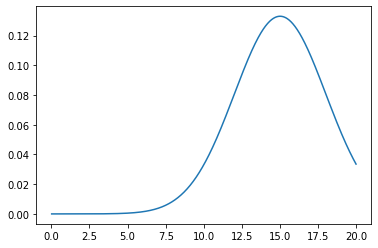

In [ ]:
plt.plot(x, y1.detach().numpy())
plt.show()

In [ ]:
import random
sdev=torch.tensor([100*random.random()], requires_grad=True)
mean=torch.tensor([100*random.random()], requires_grad=True)
pred_model=normal_dist(sdev,mean)

In [ ]:
pred=pred_model.func(x)

In [ ]:
def kl_div(model, prediction) -> torch.Tensor:
  val=torch.sum(model*torch.log(model/prediction))
  return val

In [ ]:
lr_list=[1e-1, 1e-2, 1e-3,1e-4]

In [ ]:
kl_list=[]

In [ ]:
for lr in lr_list:
  opt=torch.optim.SGD([sdev,mean], lr)
  for epoch in range(10000):
    pred_model=normal_dist(sdev,mean)

    pred=pred_model.func(x)

    kl=kl_div((y1), pred)

    kl.backward(retain_graph=True)
    
    opt.step()

    opt.zero_grad()
  kl_list.append(kl)

    # print("kl: {}".format(kl))
print("best lr: {}".format(lr_list[kl_list.index(min(kl_list))]))

best lr: 0.01


In [ ]:
opt=torch.optim.SGD([sdev, mean], 1e-2)
for epoch in range(10000):
  pred_model=normal_dist(sdev,mean)

  pred=pred_model.func(x)

  kl=kl_div((y1), pred)

  kl.backward(retain_graph=True)
  
  opt.step()

  opt.zero_grad()

sdev, mean


(tensor([2.7069], requires_grad=True), tensor([14.6847], requires_grad=True))

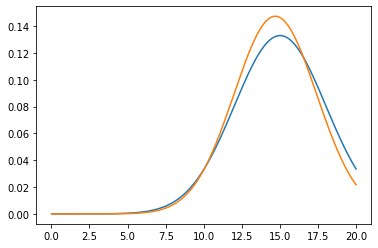

In [ ]:
plt.plot(x,y1.detach().numpy())
plt.plot(x,pred.detach().numpy())
plt.show()